In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [3]:
food = pd.read_csv('./Data/seogyodong+korean-ratio+franchise+hint+shop.csv')
food.head()

food.shape

(1643, 22)

In [14]:
data = pd.read_csv('./Data/second_target.csv')
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,204,6283,4828,402,2286,2963,2673,1717,1068,16
1,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,11,825,1041,243,629,307,322,269,97,1
2,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,136,519,635,0,185,339,242,279,112,2
3,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,66,1778,2175,31,1505,1155,439,566,256,3
4,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,676,7523,9187,208,2471,4577,3857,2990,2609,4


In [15]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명',
       '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율',
       '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율',
       '일요일_매출_비율', '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율',
       '여성_매출_비율', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율',
       '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액',
       '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액',
       '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
       '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액',
       '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
       '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
       '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수',

In [16]:
data=data[['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명','분기당_매출_금액','시간대_00~06_매출_비율',
         '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율']]

In [17]:
data['00-06장사하니']=[0 if i == 0 else 1 for i in data['시간대_00~06_매출_비율']]
data['06-11장사하니']=[0 if i == 0 else 1 for i in data['시간대_06~11_매출_비율']]
data['11-14장사하니']=[0 if i == 0 else 1 for i in data['시간대_11~14_매출_비율']]
data['14-17장사하니']=[0 if i == 0 else 1 for i in data['시간대_14~17_매출_비율']]
data['17-21장사하니']=[0 if i == 0 else 1 for i in data['시간대_17~21_매출_비율']]
data['21-24장사하니']=[0 if i == 0 else 1 for i in data['시간대_21~24_매출_비율']]

In [18]:
data['00-06장사하니'].value_counts()

0    884479
1    334178
Name: 00-06장사하니, dtype: int64

In [19]:
data['06-11장사하니'].value_counts()

1    843524
0    375133
Name: 06-11장사하니, dtype: int64

In [20]:
data['11-14장사하니'].value_counts()

1    1085728
0     132929
Name: 11-14장사하니, dtype: int64

In [21]:
data

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,...,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,00-06장사하니,06-11장사하니,11-14장사하니,14-17장사하니,17-21장사하니,21-24장사하니
0,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,45,13,38,3,0,1,1,1,1,1
1,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,42,22,35,1,0,0,1,1,1,1
2,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,39,6,30,25,0,0,1,1,1,1
3,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,31,19,48,2,0,0,1,1,1,1
4,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,28,18,27,4,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218652,2020,4,R,전통시장,11740,강동구,11740650,성내2동,1001488,성내골목시장,...,33,27,32,0,0,1,1,1,1,0
1218653,2020,4,R,전통시장,11740,강동구,11740650,성내2동,1001488,성내골목시장,...,41,31,28,0,0,0,1,1,1,0
1218654,2020,4,R,전통시장,11740,강동구,11740650,성내2동,1001488,성내골목시장,...,24,14,51,0,0,1,1,1,1,0
1218655,2020,4,R,전통시장,11740,강동구,11740650,성내2동,1001488,성내골목시장,...,23,40,29,0,0,1,1,1,1,0


In [22]:
food

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,프랜차이즈,...,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,이전_분기_프랜차이즈_점포_수,개업_폐업_프랜차이즈_점포_수,점포수**3,점포수**4,로그점포수
0,2014,2,1000466,동교로17길,CS100008,분식전문점,63683118,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216,1296,1.945910
1,2014,3,1000466,동교로17길,CS100008,분식전문점,64387581,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216,1296,1.945910
2,2014,4,1000466,동교로17길,CS100008,분식전문점,87289216,6,0,0,...,20.0,1.0,40.0,2.0,0.0,0.0,0.0,216,1296,1.945910
3,2015,1,1000466,동교로17길,CS100008,분식전문점,73207963,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125,625,1.791759
4,2015,2,1000466,동교로17길,CS100008,분식전문점,86340803,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125,625,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,2020,4,1000504,월드컵로8길,CS100009,호프-간이주점,53510321,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125,625,1.791759
1639,2021,1,1000504,월드컵로8길,CS100009,호프-간이주점,35054734,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125,625,1.791759
1640,2021,2,1000504,월드컵로8길,CS100009,호프-간이주점,43523548,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125,625,1.791759
1641,2021,3,1000504,월드컵로8길,CS100009,호프-간이주점,24153362,4,0,0,...,0.0,0.0,25.0,1.0,0.0,0.0,0.0,64,256,1.609438


In [23]:
food.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명',
       '분기당_매출_금액', '점포수', '한식음식점여부', '프랜차이즈', 'clustering', '유사_업종_점포_수',
       '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수', '이전_분기_프랜차이즈_점포_수',
       '개업_폐업_프랜차이즈_점포_수', '점포수**3', '점포수**4', '로그점포수'],
      dtype='object')

In [26]:
food=pd.merge(food,data,on=['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명'])

In [28]:
food['00-06장사하니'].value_counts()

1    951
0    692
Name: 00-06장사하니, dtype: int64

In [29]:
food['06-11장사하니'].value_counts()

1    875
0    768
Name: 06-11장사하니, dtype: int64

In [32]:
food

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액_x,점포수,한식음식점여부,프랜차이즈,...,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,00-06장사하니,06-11장사하니,11-14장사하니,14-17장사하니,17-21장사하니,21-24장사하니
0,2014,2,1000466,동교로17길,CS100008,분식전문점,63683118,6,0,0,...,61,20,16,1,1,0,1,1,1,1
1,2014,3,1000466,동교로17길,CS100008,분식전문점,64387581,6,0,0,...,64,16,15,3,1,0,1,1,1,1
2,2014,4,1000466,동교로17길,CS100008,분식전문점,87289216,6,0,0,...,62,16,18,2,1,1,1,1,1,1
3,2015,1,1000466,동교로17길,CS100008,분식전문점,73207963,5,0,0,...,63,18,16,2,1,1,1,1,1,1
4,2015,2,1000466,동교로17길,CS100008,분식전문점,86340803,5,0,0,...,60,20,17,2,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,2020,4,1000504,월드컵로8길,CS100009,호프-간이주점,53510321,5,0,0,...,13,24,32,29,1,1,1,1,1,1
1639,2021,1,1000504,월드컵로8길,CS100009,호프-간이주점,35054734,5,0,0,...,12,19,37,31,1,1,1,1,1,1
1640,2021,2,1000504,월드컵로8길,CS100009,호프-간이주점,43523548,5,0,0,...,10,20,31,39,0,0,1,1,1,1
1641,2021,3,1000504,월드컵로8길,CS100009,호프-간이주점,24153362,4,0,0,...,0,3,39,58,0,0,0,1,1,1


<AxesSubplot: xlabel='00-06장사하니', ylabel='분기당_매출_금액_x'>

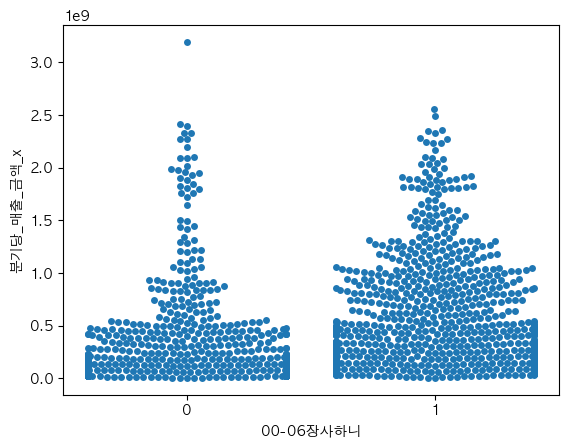

In [33]:
sns.swarmplot(
    x='00-06장사하니',
    y='분기당_매출_금액_x',
    data=food
)

<AxesSubplot: xlabel='06-11장사하니', ylabel='분기당_매출_금액_x'>

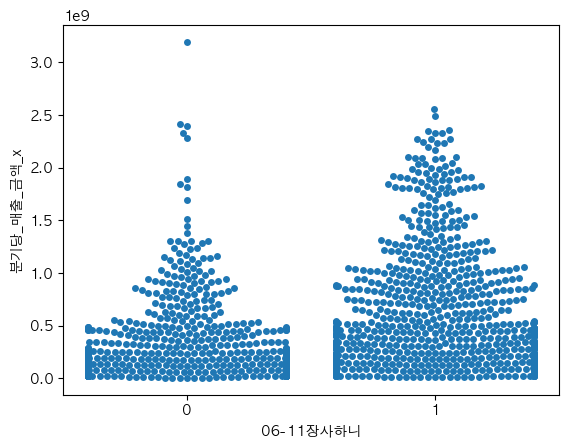

In [34]:
sns.swarmplot(
    x='06-11장사하니',
    y='분기당_매출_금액_x',
    data=food
)

<AxesSubplot: xlabel='11-14장사하니', ylabel='분기당_매출_금액_x'>

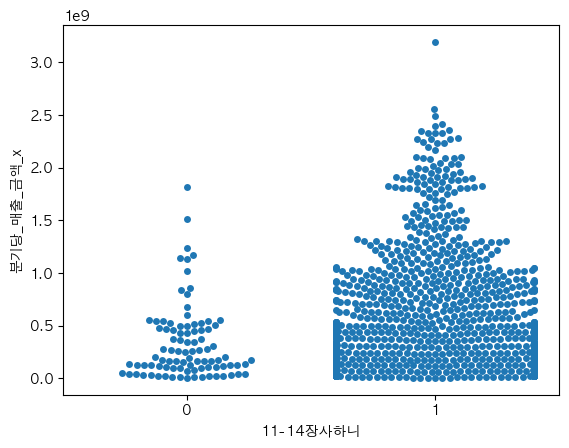

In [35]:
sns.swarmplot(
    x='11-14장사하니',
    y='분기당_매출_금액_x',
    data=food
)

<AxesSubplot: xlabel='14-17장사하니', ylabel='분기당_매출_금액_x'>

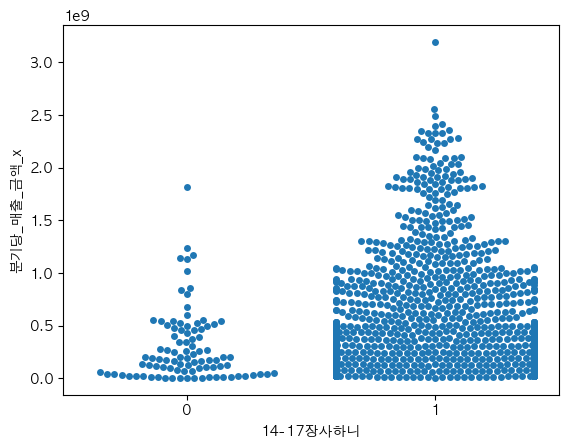

In [36]:
sns.swarmplot(
    x='14-17장사하니',
    y='분기당_매출_금액_x',
    data=food
)

<AxesSubplot: xlabel='17-21장사하니', ylabel='분기당_매출_금액_x'>

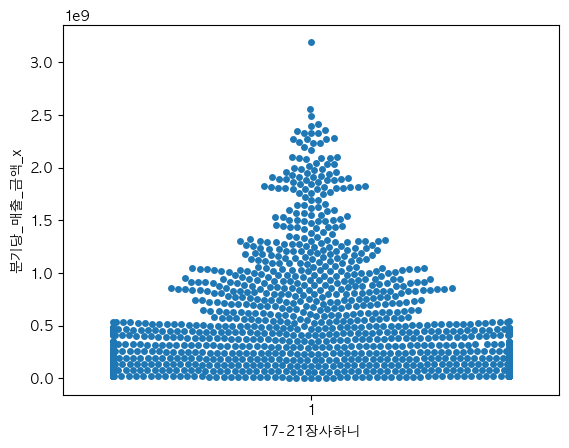

In [37]:
sns.swarmplot(
    x='17-21장사하니',
    y='분기당_매출_금액_x',
    data=food
)

<AxesSubplot: xlabel='21-24장사하니', ylabel='분기당_매출_금액_x'>

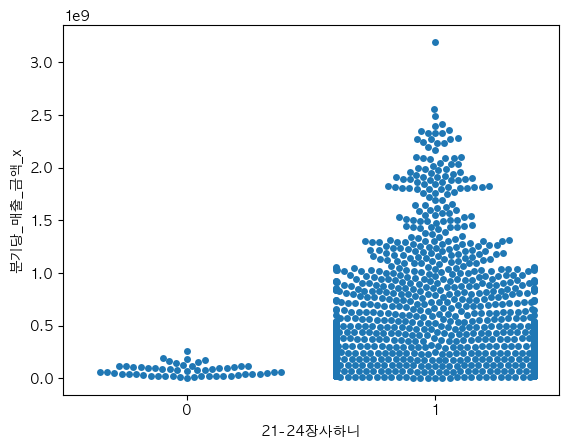

In [38]:
sns.swarmplot(
    x='21-24장사하니',
    y='분기당_매출_금액_x',
    data=food
)

In [40]:
food.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명',
       '분기당_매출_금액_x', '점포수', '한식음식점여부', '프랜차이즈', 'clustering', '유사_업종_점포_수',
       '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수', '이전_분기_프랜차이즈_점포_수',
       '개업_폐업_프랜차이즈_점포_수', '점포수**3', '점포수**4', '로그점포수', '상권_구분_코드',
       '상권_구분_코드_명', '시군구코드', '시군구명', '행정동_코드', '행정동_코드_명', '분기당_매출_금액_y',
       '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '00-06장사하니',
       '06-11장사하니', '11-14장사하니', '14-17장사하니', '17-21장사하니', '21-24장사하니'],
      dtype='object')

In [55]:
feature = food[['점포수', '한식음식점여부', '프랜차이즈','00-06장사하니','06-11장사하니', '11-14장사하니', '14-17장사하니','21-24장사하니']]
target = food['분기당_매출_금액_x']

In [61]:
from module.default import basic
basic(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.7527094043210623
test :  0.6712918093672546
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.6356105438301991
test :  0.6309659950618467
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.6356001784957993
test :  0.6310023680471867
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.6356105438301982
test :  0.6309659956855451
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.8383343036352302
test :  0.7091578587466655
--------------------------------------------------
